# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [2]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [3]:
import pandas as pd

Import project files

In [4]:
from utils import nlp_utils

Uploading data

In [5]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [6]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 0 ns
Wall time: 16 ms


Defining the word dictionary

In [7]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])

CPU times: total: 26.8 s
Wall time: 33.9 s


Clustering

In [8]:
%%time
word_list = nlp_utils.get_word_list_for_clustering(word_dict)
embedded_dict = nlp_utils.embed_corpus(word_list)
cluster_dict, dbscan = nlp_utils.run_clustering(embedded_dict)

CPU times: total: 2.7 s
Wall time: 2.56 s


Plotting tSNE

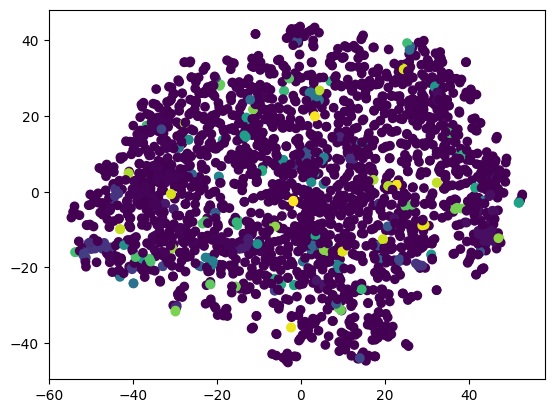

CPU times: total: 58.5 s
Wall time: 23.2 s


In [9]:
%%time
nlp_utils.plot_tsne(embedded_dict, dbscan)

Plotting Jaccard index histogram

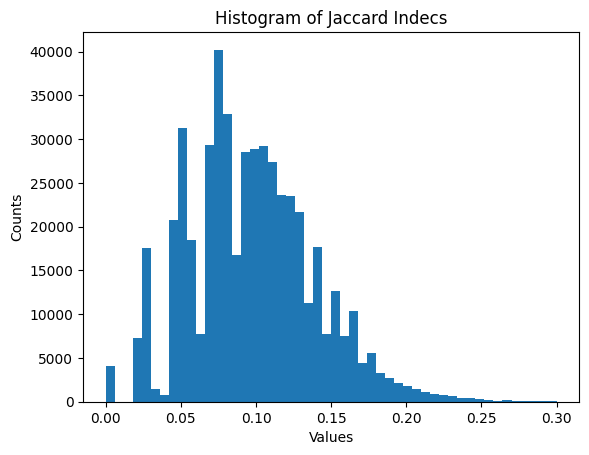

CPU times: total: 7.92 s
Wall time: 8.9 s


In [10]:
%%time
nlp_utils.plot_jaccard_hist(df)

In [11]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = nlp_utils.get_word_list_for_clustering(test_dict)
test_list

['chocolate', 'banana', 'hi', 'cola', 'love']

Starting average Jaccard index: 0.08490466655897647
	replacing ['though', 'let', 'enough', 'carry', 'fill', 'everything', 'hopefully', 'find', 'anybody', 'another', 'break', 'high', 'time', 'basically', 'anyway', 'barely', 'reason', 'already', 'understand', 'yet', 'much', 'hardly', 'jump', 'run', 'four', 'mess', 'make', 'unless', 'easy', 'twice', 'still', 'normally', 'rather', 'yesterday', 'last', 'less', 'see', 'need', 'exactly', 'next', 'away', 'dumb', 'listen', 'year', 'sure', 'catch', 'otherwise', 'second', 'go', 'nothing', 'yeah', 'think', 'get', 'whole', 'three', 'every', 'collect', 'guess', 'talk', 'actually', 'bring', 'two', 'matter', 'either', 'forget', 'expect', 'however', 'tell', 'since', 'ever', 'unfortunately', 'although', 'whether', 'straight', 'many', 'soon', 'five', 'hear', 'necessary', 'today', 'perhaps', 'apparently', 'absolutely', 'handle', 'stupid', 'fly', 'loose', 'well', 'always', 'least', 'far', 'hope', 'obviously', 'else', 'look', 'maybe', 'yes', 'side', 'lot', 

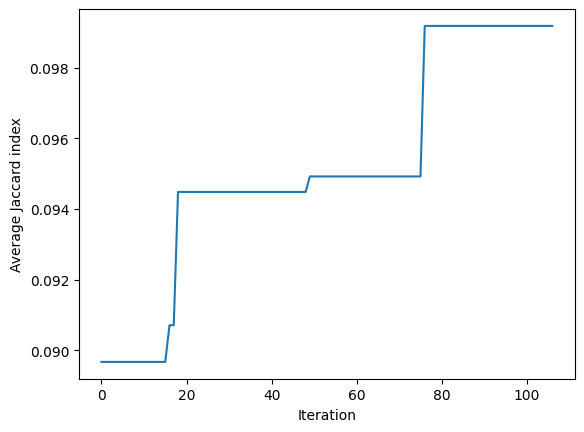

In [12]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, word_dict)

In [14]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : I have a copy of this bo...,{voice} (from) (the) farm : i (have) (a) copy ...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track be not the "" original ...","caution ! : (these) track {be} (not) (the) "" o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and be in excelle...,textbook : book ship quickly (and) {be} (in) e...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it be great ! ! ! : I there it . it be very co...,(it) {be} [great] ! ! ! : i [there] (it) . (it...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools be just what ...,{docker} {do} (the) job . : (this) [tools] {be...
5,334,awesome: this is probably the best essay i hav...,1,25,great : this be there the fun essay I have the...,[great] : (this) {be} [there] (the) [fun] essa...
6,370,good deal and fast shipping: i bought this boo...,1,27,fun trade and fast shipping : I new this book ...,[fun] [trade] (and) fast shipping : i [new] (t...
7,373,love scarpetta: you have to love the scarpetta...,1,21,love scarpetta : you have to love the scarpett...,love scarpetta : (you) (have) (to) love (the) ...
8,414,gift: i bought this for a christmas present fo...,1,25,gift : I new this for a christmas present for ...,{gift} : i [new] (this) (for) (a) christmas pr...
9,461,just awful: this was possibly the worst book i...,0,25,just awful : this be there the like book I hav...,(just) awful : (this) {be} [there] (the) [like...


Looking at the histogram again

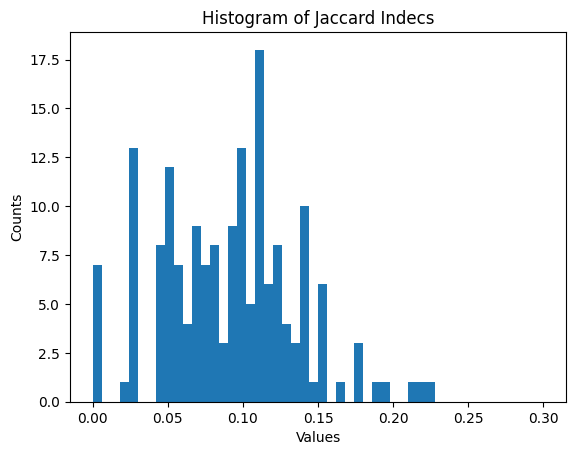

CPU times: total: 391 ms
Wall time: 416 ms


In [15]:
%%time
nlp_utils.plot_jaccard_hist(df_2)